# Import Dependencies and Check GPU

In [2]:
import torch
import numpy as np
import random
import os
import shutil

from task1Utils import load_dataset, get_model, train, plot_loss

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device:", device)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

device: cuda


# Set Seeds

In [3]:
# Set Seeds

seed = 50

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True

# Define Training Params

In [4]:
# Params

task = 'task1'
model_name = 'ResNet18'
channel = 'RGB'

img_size = 150
initial_lr = 0.001
gamma = 0.2 # StepLR gamma
step = 5 # StepLR step size
num_epochs = 30
train_batch_size = 256

name = '{}-{}-{}-{}-LR-{}-gamma-{}-step-{}-epochs-{}'.format(task, model_name, channel, img_size,
                                                             initial_lr, gamma, step, num_epochs)
checkpoint_dir = './checkpoints_'+name

# Load Data

In [5]:
train_loader, test_loader, CLASSES = load_dataset(train_batch_size)

# Create Checkpoints Directory

In [6]:
# NOTE: THIS WILL OVERWRITE PREVIOUS RUN OF THE SAME NAME

if os.path.exists(checkpoint_dir) and os.path.isdir(checkpoint_dir):
    shutil.rmtree(checkpoint_dir)

os. makedirs(checkpoint_dir, exist_ok=True)

# Build Model

In [7]:
model = get_model(model_name)
model.to(device);

# Start Training

In [8]:
log = train(1, num_epochs, name, model, train_loader,
            test_loader, initial_lr, step, gamma)

100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.55it/s]
/home/sw01635/.local/lib/python3.8/site-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


[001] train loss: 1.101980 test loss: 2.005154 test accuracy: 0.334133



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.67it/s]


[002] train loss: 0.659182 test loss: 0.644838 test accuracy: 0.764933



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.72it/s]


[003] train loss: 0.386325 test loss: 0.657698 test accuracy: 0.726400



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.64it/s]


[004] train loss: 0.306371 test loss: 0.406768 test accuracy: 0.860267



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.58it/s]


[005] train loss: 0.260395 test loss: 0.359425 test accuracy: 0.860667



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.53it/s]


[006] train loss: 0.159114 test loss: 0.223263 test accuracy: 0.924667



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.53it/s]


[007] train loss: 0.122954 test loss: 0.208301 test accuracy: 0.924933



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.56it/s]


[008] train loss: 0.106888 test loss: 0.257260 test accuracy: 0.920933



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.78it/s]


[009] train loss: 0.086927 test loss: 0.224294 test accuracy: 0.929867



100%|██████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.50it/s]


[010] train loss: 0.075921 test loss: 0.269423 test accuracy: 0.919867



# Plot Loss

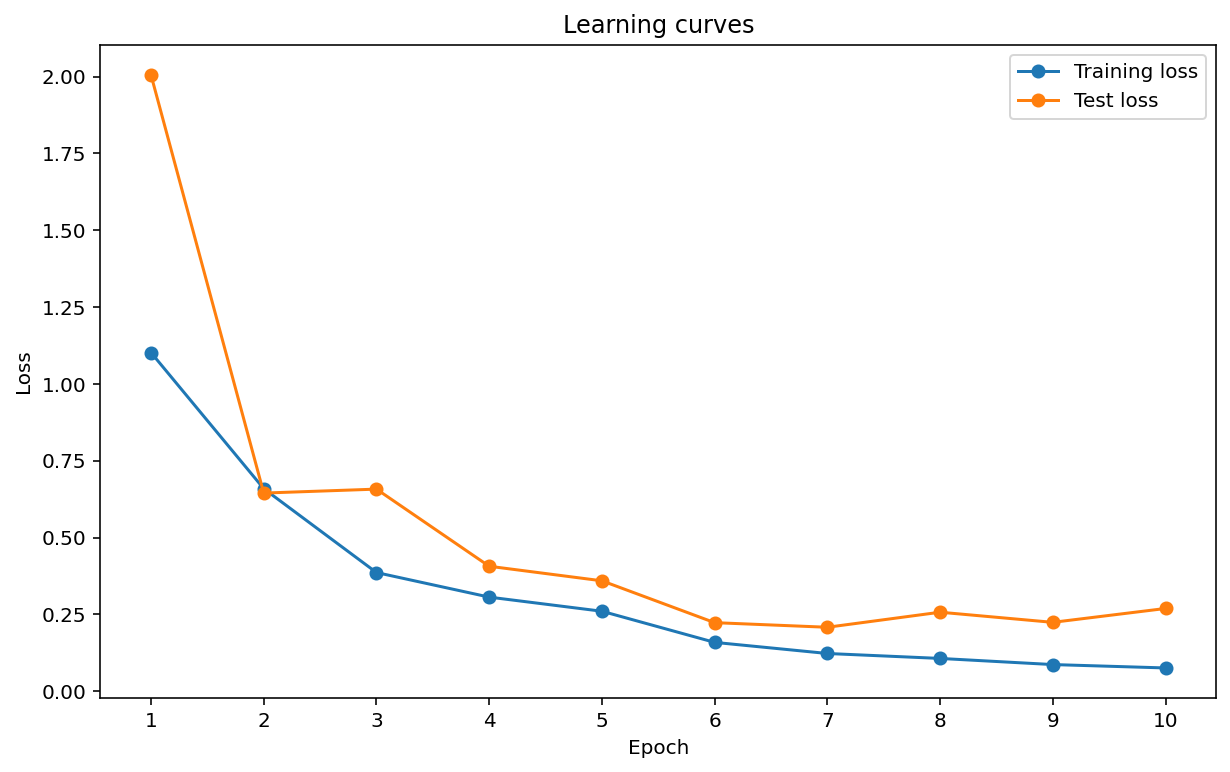

In [10]:
plot_loss(log['train_losses'], log['test_losses'])